# DATA SCIENCE & AI (FIAP MBA) - Sabrina Otoni da Silva - 2023

## Projeto nº 13

### Professor: Ahirton Lopes (Machine Learning: Aula 5) -- https://github.com/ahirtonlopes/Mastering-Machine-Learning

### Regressão Logística

Vamos utilizar os mesmos dados empregados no modelo de regressão linear para uma outra tarefa. Classificar o indivíduo nos sexos masculino e feminino dado o seu peso e altura.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [2]:
pesos = pd.read_csv('weights.csv', sep=';')

Como já fizemos uma análise exploratória de dados no exercício de regressão linear, vamos pular essa parte e seguirmos direto para a remoção dos outliers.

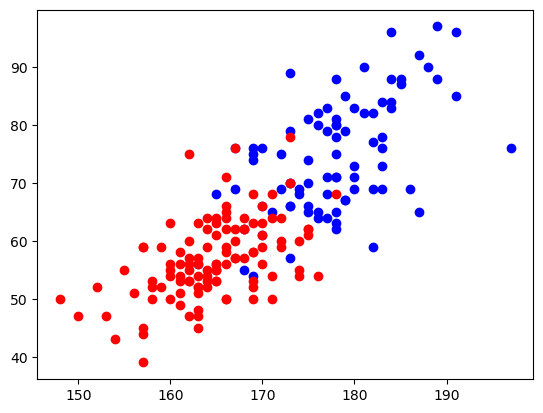

In [3]:
pesos = pesos[pesos.weight <= 100].reset_index(drop=True)
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Observe que, apesar de uma leve sobreposição, conseguimos separar os indivídos do sexo masculino com uma reta.

O que vamos encontrar com nossa Regressão Logística é a reta que melhor separa esses dados:

In [4]:
dummies_sex = pd.get_dummies(pesos.sex, drop_first=True)
pesos = pd.concat([pesos, dummies_sex], axis=1)
pesos.head()

,sex,weight,height,M
0,M,77,182,1
1,F,58,161,0
2,F,53,161,0
3,M,68,177,1
4,F,59,157,0


In [5]:
X = pesos[['weight', 'height']]
y = pesos.M

In [6]:
reg_log = LogisticRegression()
reg_log.fit(X, y)

LogisticRegression()

In [7]:
arvore = DecisionTreeClassifier()
arvore.fit(X, y)

DecisionTreeClassifier()

Assim como na regressão linear, podemos observar os coeficientes

In [8]:
reg_log.coef_

array([[0.17641775, 0.28344861]])

In [9]:
reg_log.intercept_

array([-60.13537315])


Isso quer dizer que a equação da nossa função logística é: <br>
    $prob(homem) = \frac{1}{1 + e^{-(peso\times 0.2199 - altura\times 0.0753 - 1.5576)}}$

Com esses coeficientes identificamos que a reta que separa indivíduos masculinos de femininos é: <br>
$peso\times 0.2199 - altura\times 0.0753 - 1.5576 = 0$

Podemos visualizar essa reta, para isso devemos escrevê-la em função de $peso$ ou $altura$, já que meu $y$ é fixo em $0$. <br>
Com algumas manipulações algébricas temos a reta em função da $altura$ dada por: <br><br>
    $peso = \frac{-altura\times 0.0753 + 1.5576}{0.2199}$

In [10]:
heights = np.linspace(140, 210, 70)
coef_weight = float(reg_log.coef_[0][0])
coef_height = float(reg_log.coef_[0][1])
intercept = float(reg_log.intercept_)

reta_decisao = (-heights*coef_height - intercept) / coef_weight

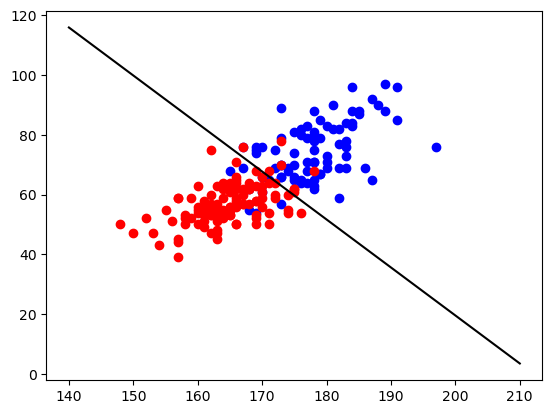

In [11]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], y=pesos.loc[pesos.sex=='F', 'weight'], c='red')
plt.plot(heights, reta_decisao, '-', c='black')
plt.show()

Vamos visualizar os dados classificados conferirmos se foram classificados de acordo com nossa superfície de decisão. Para isso classificamos esses mesmos dados, assim obtemos os rótulos dados durante o treinamento.

In [12]:
classified_reg = reg_log.predict(X)
classified_reg

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
      dtype=uint8)

In [13]:
classified_arv = arvore.predict(X)
classified_arv

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
      dtype=uint8)

Concatenamos esses dados (na forma de um dataframe), aos dados originais para conseguirmos plotá-los.

In [14]:
pesos_classified_reg = pd.concat([pesos, pd.DataFrame(classified_reg, columns=['classificado_reg'])], axis=1)
pesos_classified_arv = pd.concat([pesos, pd.DataFrame(classified_arv, columns=['classificado_arv'])], axis=1)


In [15]:
pesos_classified_reg.head(100)

,sex,weight,height,M,classificado_reg
0,M,77,182,1,1
1,F,58,161,0,0
2,F,53,161,0,0
3,M,68,177,1,1
4,F,59,157,0,0
...,...,...,...,...,...
95,F,55,164,0,0
96,M,63,178,1,1
97,F,47,163,0,0
98,F,45,163,0,0


In [16]:
pesos_classified_arv.head(100)

,sex,weight,height,M,classificado_arv
0,M,77,182,1,1
1,F,58,161,0,0
2,F,53,161,0,0
3,M,68,177,1,1
4,F,59,157,0,0
...,...,...,...,...,...
95,F,55,164,0,0
96,M,63,178,1,1
97,F,47,163,0,0
98,F,45,163,0,0


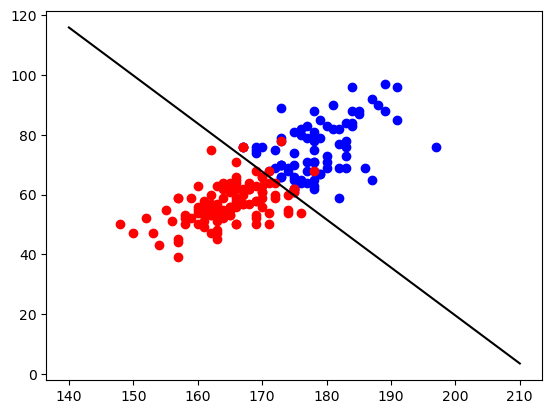

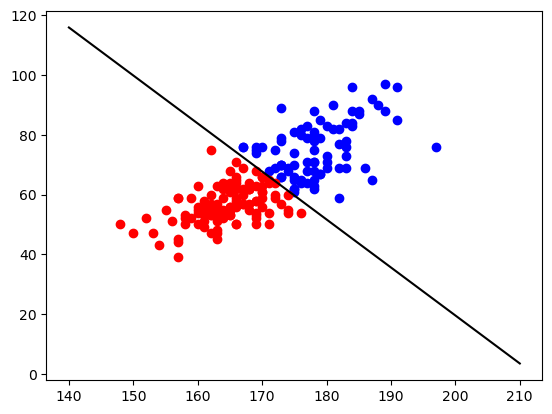

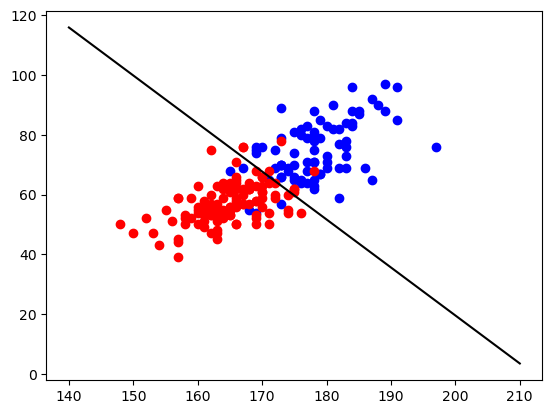

In [17]:
plt.scatter(x=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==1.0, 'height'], y=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==1.0, 'weight'], c='blue')
plt.scatter(x=pesos_classified_arv.loc[pesos_classified_arv.classificado_arv==0.0, 'height'], y=pesos_classified_arv.loc[pesos_classified_arv.classificado_arv==0.0, 'weight'], c='red')
plt.plot(heights, reta_decisao, '-', c='black')
plt.show()

plt.scatter(x=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==1.0, 'height'], y=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==1.0, 'weight'], c='blue')
plt.scatter(x=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==0.0, 'height'], y=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==0.0, 'weight'], c='red')
plt.plot(heights, reta_decisao, '-', c='black')
plt.show()

plt.scatter(x=pesos_classified_arv.loc[pesos_classified_arv.classificado_arv==1.0, 'height'], y=pesos_classified_arv.loc[pesos_classified_arv.classificado_arv==1.0, 'weight'], c='blue')
plt.scatter(x=pesos_classified_arv.loc[pesos_classified_arv.classificado_arv==0.0, 'height'], y=pesos_classified_arv.loc[pesos_classified_arv.classificado_arv==0.0, 'weight'], c='red')
plt.plot(heights, reta_decisao, '-', c='black')
plt.show()

Como esperado, os indivíduos "acima" da reta tem valor positivo em relação a ela, logo assumem a classe 1 (masculino). Já os "abaixo", possuem valor negativo e assumem a classe 0

Como o modelo de Regressão Logística é probabilístico, muitas vezes é interessante obtermos a probabilidade de um elemento pertencer à classe determinada. Neste caso usamos o método predict_proba()

In [18]:
novo_exemplo = [[75.00, 173]]

In [19]:
reg_log.predict_proba(novo_exemplo)

c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.10597149, 0.89402851]])

In [20]:
arvore.predict_proba(novo_exemplo)

c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 1.]])

Portanto, para nosso modelo, uma pessoa de 1,73m e 75Kg, a probabilidade de ser do sexo masculino é 89% e do feminino 11%

In [21]:
X.head()

,weight,height
0,77,182
1,58,161
2,53,161
3,68,177
4,59,157


Em um plano 3D conseguimer ver a sigmoid

In [22]:
from mpl_toolkits.mplot3d import Axes3D

In [23]:
weights = X['weight']

In [24]:
heights = X['height']

In [25]:
probs = pd.DataFrame(reg_log.predict_proba(X)[:,1], columns=['probs'])

In [26]:
pesos_classificados = pd.concat([X, probs], axis=1)

In [27]:
pesos_classificados.head()

,weight,height,probs
0,77,182,0.993545
1,58,161,0.013817
2,53,161,0.005766
3,68,177,0.884059
4,59,157,0.005350


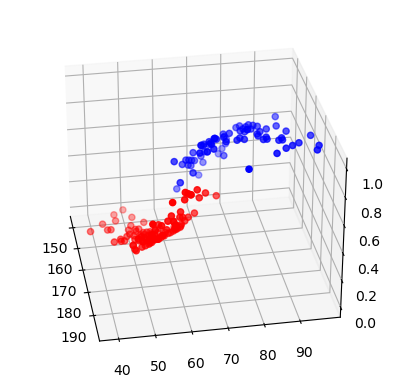

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'height'],
           ys=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'weight'],
           zs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'probs'],
           c='blue', marker='o')
ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'height'],
           ys=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'weight'],
           zs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'probs'],
           c='red', marker='o')
ax.azim = 350 #alterar o valore aqui para rotacionar o grafico


Podemos ver a superfície de decisão

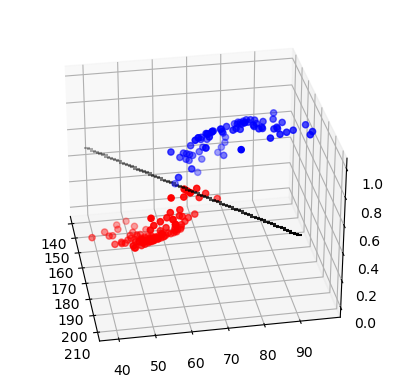

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'height'],
           ys=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'weight'],
           zs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'probs'],
           c='blue', marker='o')
ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'height'],
           ys=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'weight'],
           zs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'probs'],
           c='red', marker='o')
ax.scatter(xs=np.linspace(140, 210, 70),
           ys=np.linspace(40, 90, 70),
           zs=np.ones(70)*0.5, marker='_', c='black')
ax.azim = 350